In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sacramento
Processing Record 2 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | dholka
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | naracoorte
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | uturoa
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | sormiou
City not found. Skipping...
Processing Record 16 of Set 1 | linkou
Processing Record 17 of Set 1 | suntar
Processing Record 18 of Set 1 | wynyard
Processing Record 19 of Set 1 | curillo
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | kingston
Processing Record 22 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sacramento,38.4666,-121.3177,82.78,48,0,13.80,US,1686797286
1,bethel,41.3712,-73.4140,62.96,74,11,10.31,US,1686797185
2,dholka,22.7167,72.4667,84.58,65,46,24.07,IN,1686797824
3,iqaluit,63.7506,-68.5145,37.13,69,75,13.80,CA,1686797391
4,naracoorte,-36.9579,140.7383,56.12,87,98,16.69,AU,1686797824


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sacramento,38.4666,-121.3177,82.78,48,0,13.80,US,1686797286
1,bethel,41.3712,-73.4140,62.96,74,11,10.31,US,1686797185
2,dholka,22.7167,72.4667,84.58,65,46,24.07,IN,1686797824
3,iqaluit,63.7506,-68.5145,37.13,69,75,13.80,CA,1686797391
4,naracoorte,-36.9579,140.7383,56.12,87,98,16.69,AU,1686797824


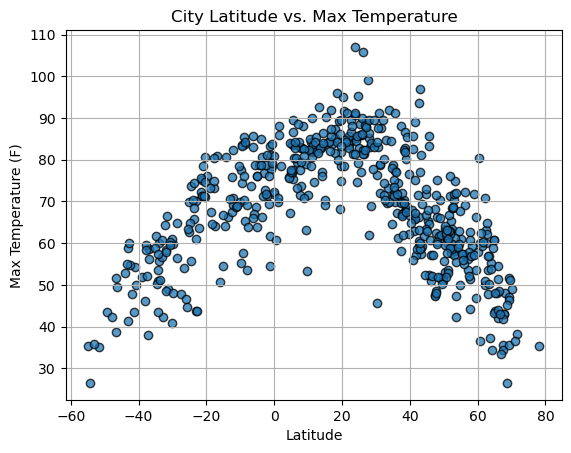

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


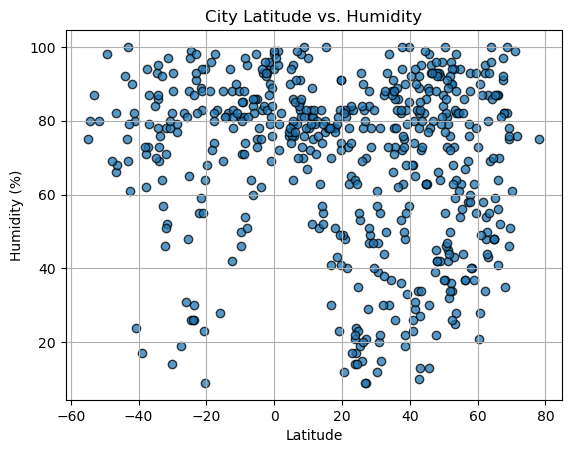

In [10]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


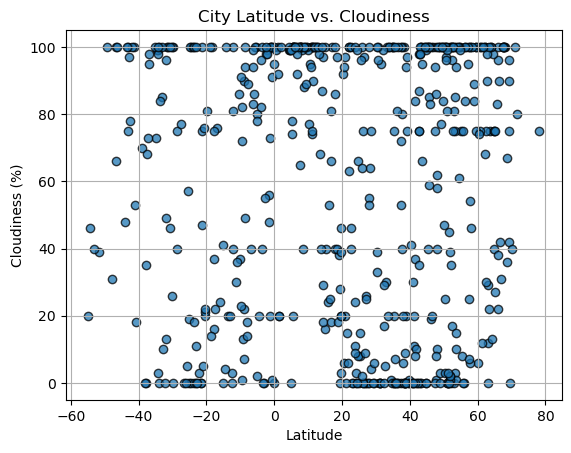

In [11]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


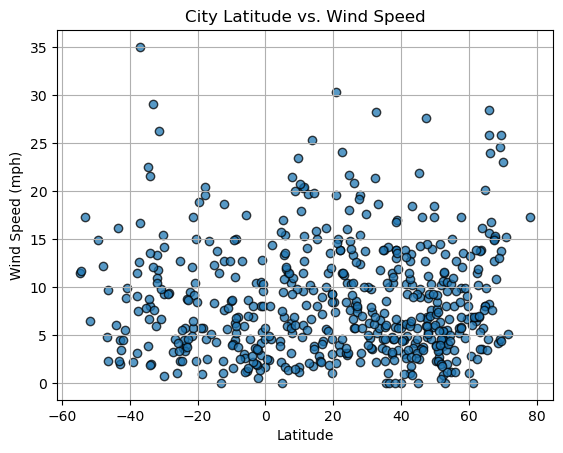

In [12]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


In [13]:
# Define a function to create linear regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, output_file):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", linewidth=1)
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Add the equation of the line
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Print the R-squared value
    r_squared = rvalue ** 2
    r_squared_label = f"R-squared: {r_squared:.2f}"
    plt.annotate(r_squared_label, (min(x_values), min(y_values) + 10), fontsize=12, color="red")
    
    # Set the grid
    plt.grid(True)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show the plot
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sacramento,38.4666,-121.3177,82.78,48,0,13.80,US,1686797286
1,bethel,41.3712,-73.4140,62.96,74,11,10.31,US,1686797185
2,dholka,22.7167,72.4667,84.58,65,46,24.07,IN,1686797824
3,iqaluit,63.7506,-68.5145,37.13,69,75,13.80,CA,1686797391
6,tiksi,71.6872,128.8694,38.16,76,80,5.14,RU,1686797378


In [17]:
# Create a DataFrame with the Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,naracoorte,-36.9579,140.7383,56.12,87,98,16.69,AU,1686797824
5,waitangi,-43.9535,-176.5597,52.83,92,48,5.99,NZ,1686797377
7,uturoa,-16.7333,-151.4333,80.80,83,76,14.83,PF,1686797390
10,port-aux-francais,-49.3500,70.2167,43.48,98,100,14.88,TF,1686797379
12,adamstown,-25.0660,-130.1015,69.75,65,19,12.66,PN,1686797825


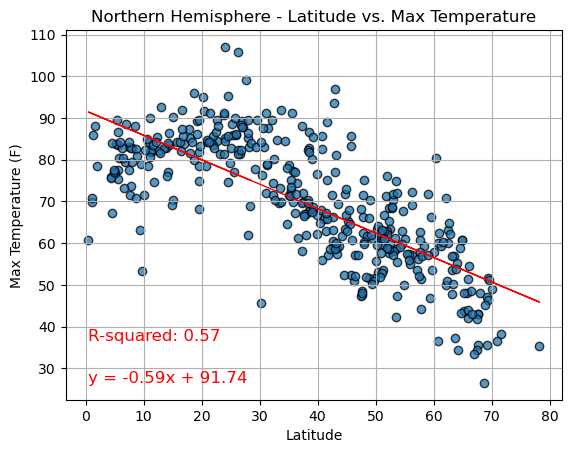

In [18]:
# Perform linear regression on Northern Hemisphere latitude vs. maximum temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the create_linear_regression_plot function to create the plot
create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temperature (F)", "Northern Hemisphere - Latitude vs. Max Temperature", "output_data/Northern_Hemi_Lat_vs_Max_Temp.png")


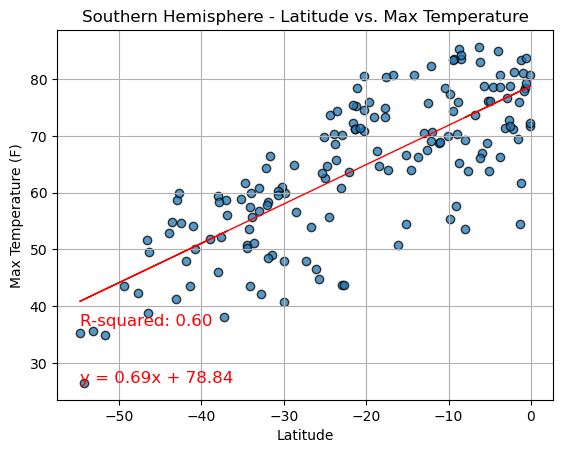

In [19]:
# Perform linear regression on Southern Hemisphere latitude vs. maximum temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the create_linear_regression_plot function to create the plot
create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temperature (F)", "Southern Hemisphere - Latitude vs. Max Temperature", "output_data/Southern_Hemi_Lat_vs_Max_Temp.png")


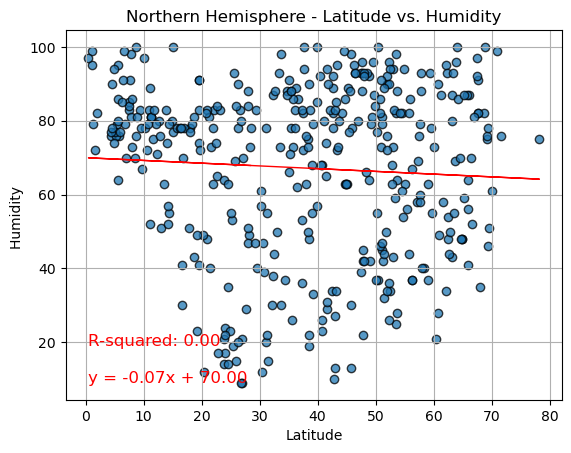

In [24]:
# Perform linear regression on Northern Hemisphere latitude vs. humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the create_linear_regression_plot function to create the plot
create_linear_regression_plot(x_values, y_values, "Latitude", "Humidity ", "Northern Hemisphere - Latitude vs. Humidity", "output_data/Northern_Hemi_Lat_vs_Humidity.png")



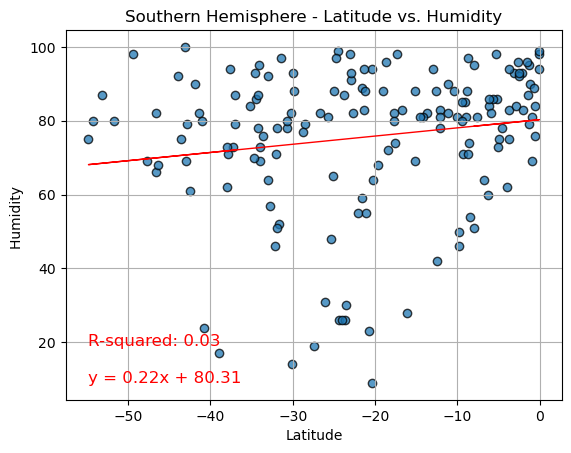

In [26]:
# Perform linear regression on Northern Hemisphere latitude vs. humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the create_linear_regression_plot function to create the plot
create_linear_regression_plot(x_values, y_values, "Latitude", "Humidity ", "Southern Hemisphere - Latitude vs. Humidity", "output_data/Southern_Hemi_Lat_vs_Humidity.png")



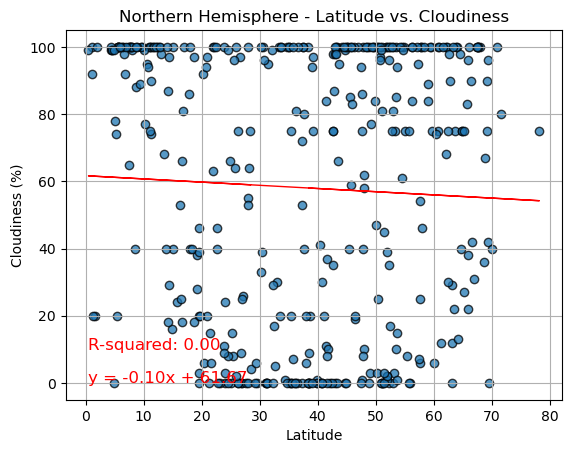

In [27]:
# Perform linear regression on Northern Hemisphere latitude vs. cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the create_linear_regression_plot function to create the plot
create_linear_regression_plot(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern Hemisphere - Latitude vs. Cloudiness", "output_data/Northern_Hemi_Lat_vs_Cloudiness.png")


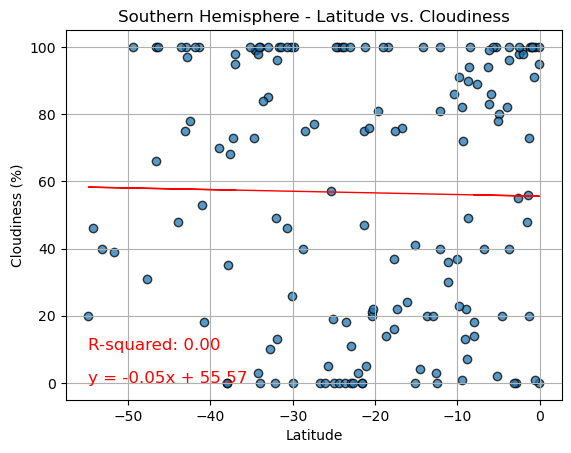

In [28]:
# Perform linear regression on Northern Hemisphere latitude vs. cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the create_linear_regression_plot function to create the plot
create_linear_regression_plot(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern Hemisphere - Latitude vs. Cloudiness", "output_data/Southern_Hemi_Lat_vs_Cloudiness.png")


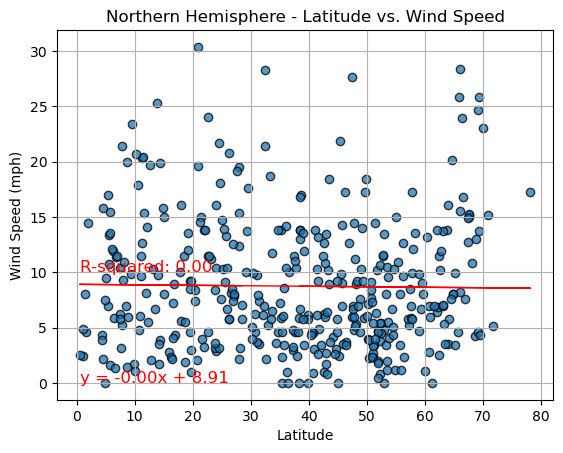

In [29]:
# Perform linear regression on Northern Hemisphere latitude vs. wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the create_linear_regression_plot function to create the plot
create_linear_regression_plot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Latitude vs. Wind Speed", "output_data/Northern_Hemi_Lat_vs_Wind_Speed.png")


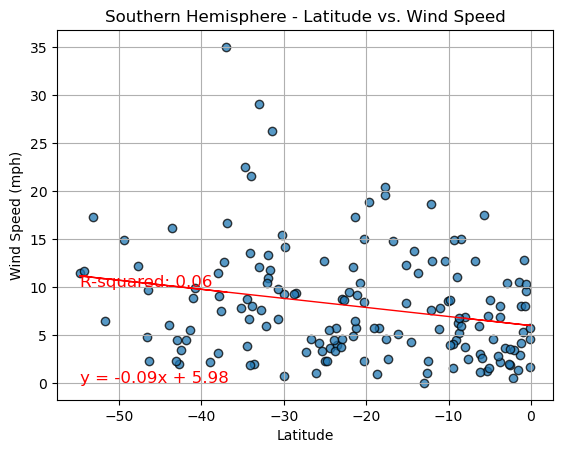

In [30]:
# Perform linear regression on Northern Hemisphere latitude vs. wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the create_linear_regression_plot function to create the plot
create_linear_regression_plot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Latitude vs. Wind Speed", "output_data/Southern_Lat_vs_Wind_Speed.png")
